In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import pandas as pd

# Load the data
#d_s = pd.read_csv('sample_submission.csv')
te_d = pd.read_csv('test.csv')
tr_d = pd.read_csv('train.csv')

# Dropping 'id' column
tr_d.drop(columns=['id'], inplace=True)
te_d.drop(columns=['id'], inplace=True)

# Display the first few rows of the training and test data
print("Training Data:")
display(tr_d.head())

print("Test Data:")
display(te_d.head())


Training Data:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


Test Data:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [3]:
# Training dataset information
print("Training Data Information:")
tr_d.info()

# Test dataset information
print("Test Data Information:")
te_d.info()

# Shape of the datasets
print(f"Shape of Training Data: {tr_d.shape}")
print(f"Shape of Test Data: {te_d.shape}")


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems        

In [4]:
# Summary statistics of the training data
print("Training Data Summary Statistics:")
display(tr_d.describe())


Training Data Summary Statistics:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [5]:
# Check for missing values in the training data
print("Missing Values in Training Data:")
print(tr_d.isnull().sum())

# Check for missing values in the test data
print("Missing Values in Test Data:")
print(te_d.isnull().sum())


Missing Values in Training Data:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64
Missing Values in Test Data:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0


In [6]:
# Check for duplicate values in the training data
print("Duplicate Values in Training Data:")
print(tr_d.duplicated().sum())

# Check for duplicate values in the test data
print("Duplicate Values in Test Data:")
print(te_d.duplicated().sum())


Duplicate Values in Training Data:
0
Duplicate Values in Test Data:
0


<AxesSubplot:>

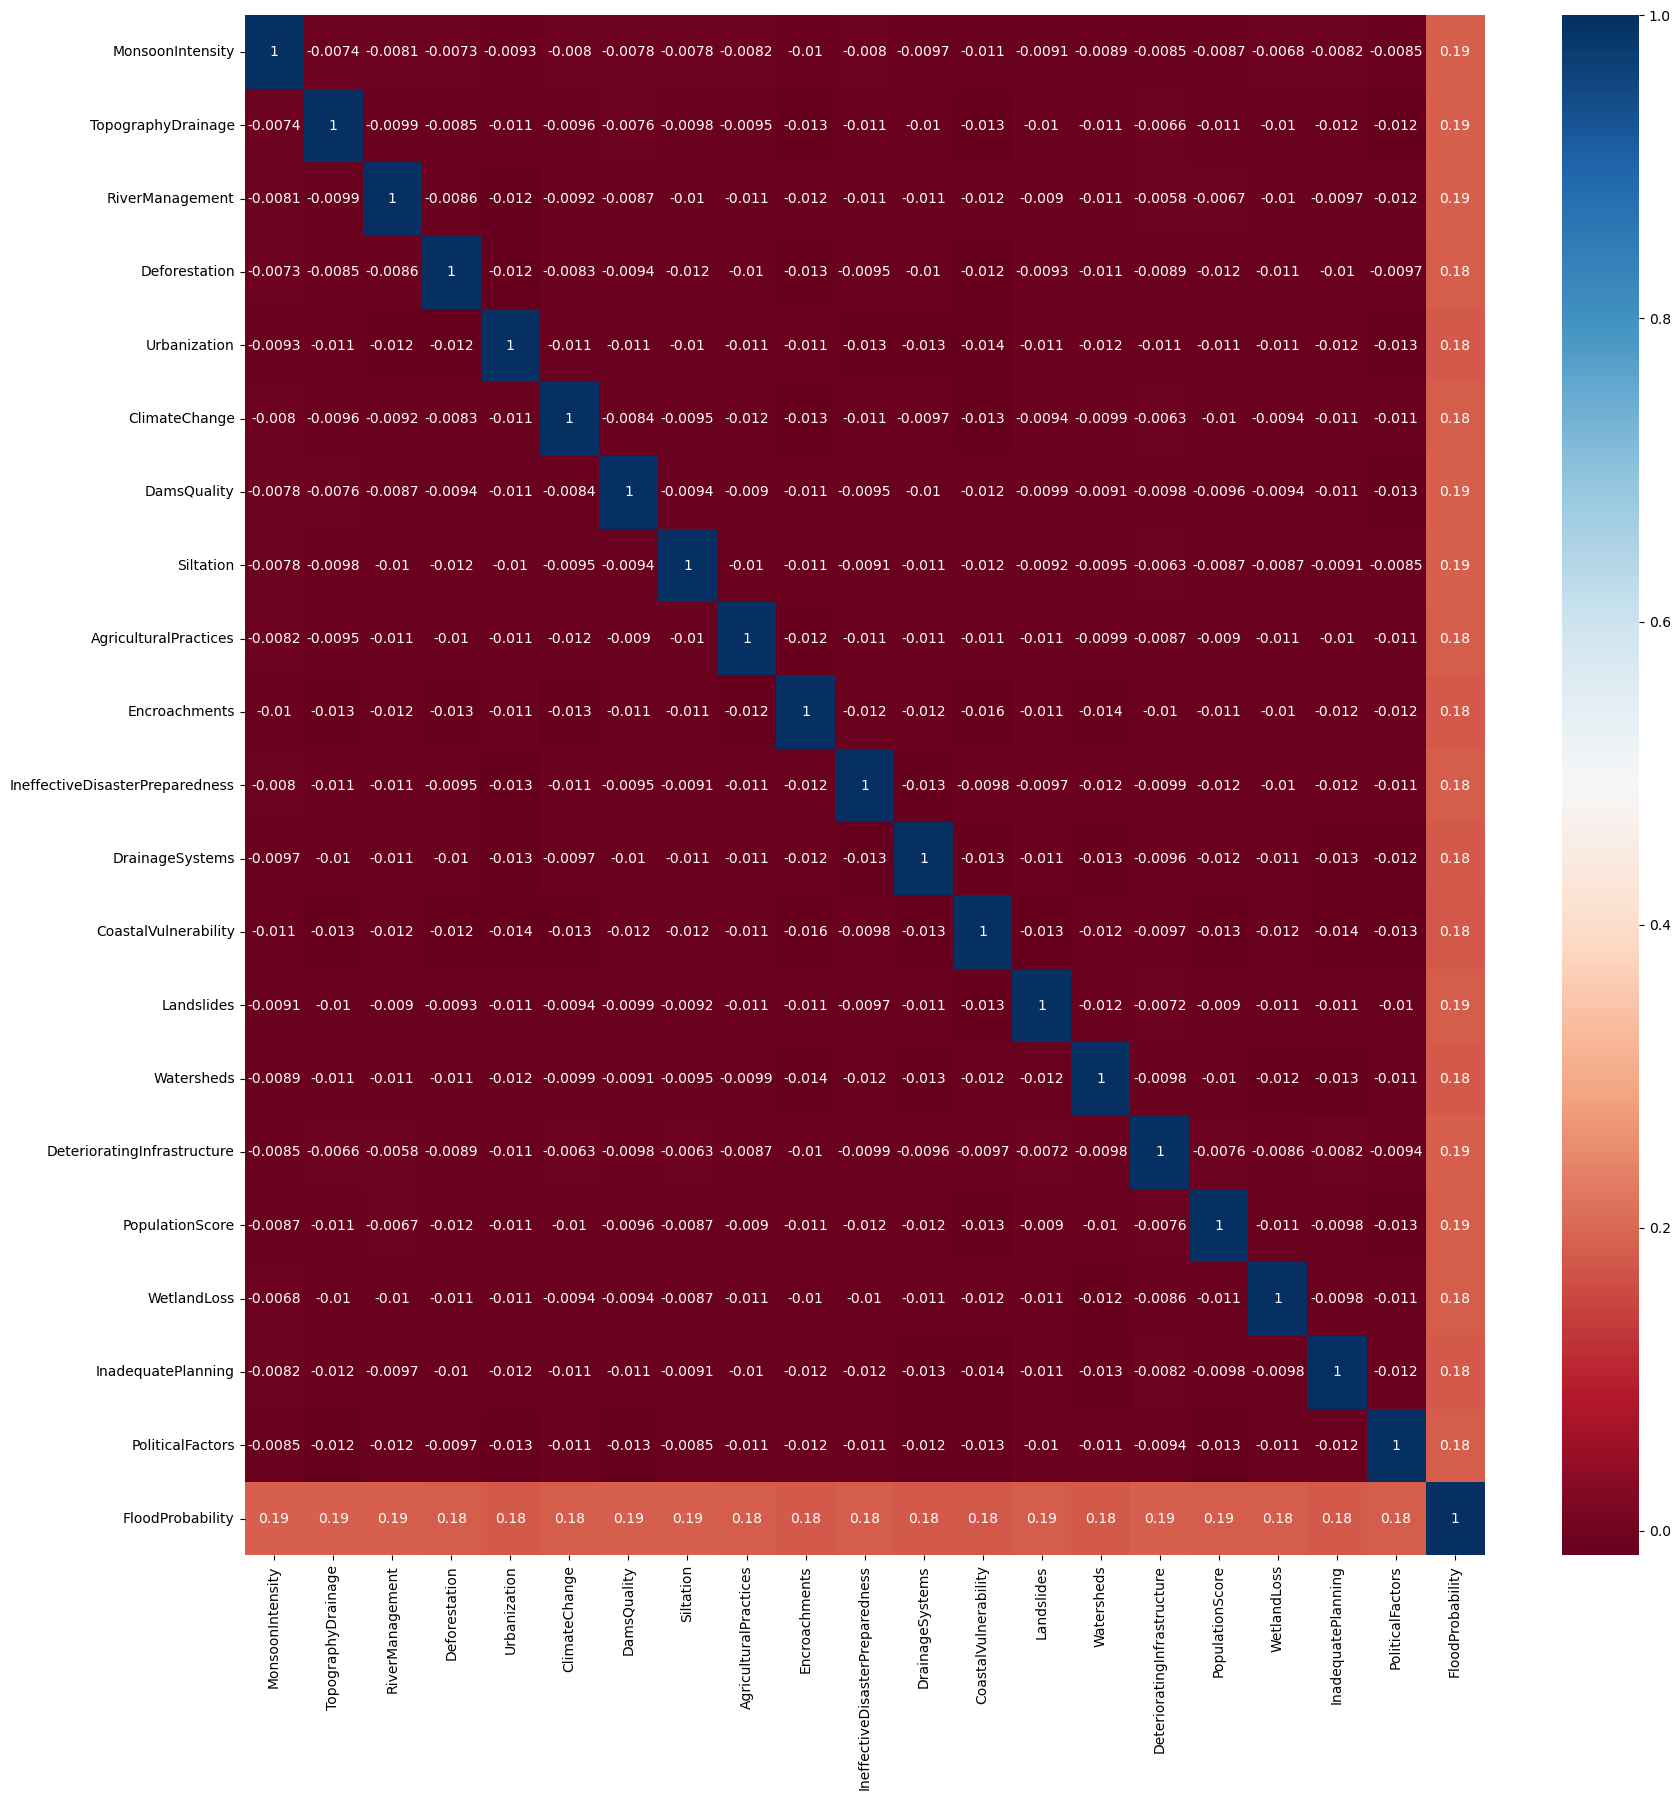

In [7]:
corr = tr_d.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap='RdBu', annot=True, ax=ax)

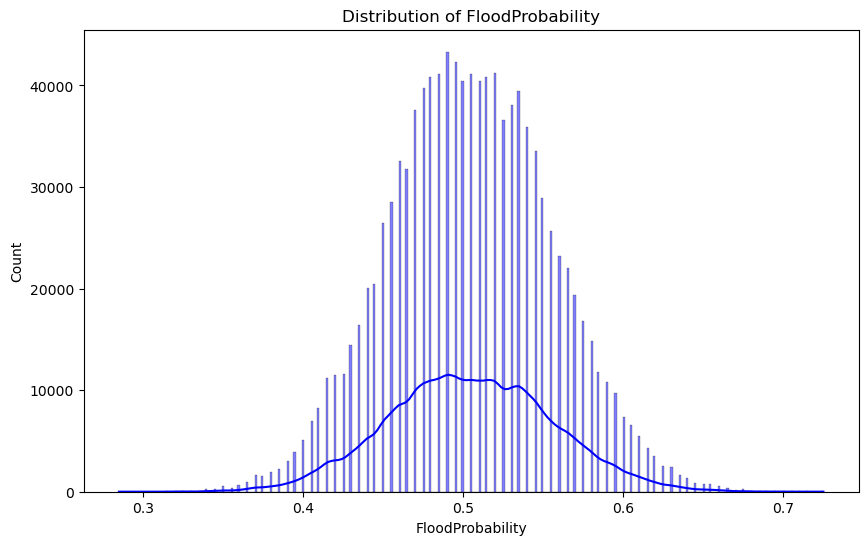

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(tr_d['FloodProbability'], kde=True, color='blue')
plt.title('Distribution of FloodProbability')
plt.show()


In [9]:
#This part of the code converts all columns except the FloodProbability column to the uint8 data type.
for col in tr_d.columns:
    if col != 'FloodProbability':
        tr_d[col] = tr_d[col].astype('uint8')
        te_d[col] = te_d[col].astype('uint8')


In [10]:
#This part creates new features by performing various operations on the specified columns (cols).
#These new features might help capture the interactions and variability between different features, potentially improving the model's ability to make accurate predictions.
# Cols
cols = [
       'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors',
       ]
# Function
def N_F(df):
    
    df['fsum'] = df[cols].sum(1)
    df['prod'] = df[cols].prod(1)
    df['fmin'] = df[cols].max(1)
    df['fmax'] = df[cols].min(1)
    df['fvar'] = df[cols].var(1)
    df['fskew'] = df[cols].skew(1)

    return df
# Call
tr_d = N_F(tr_d)
te_d = N_F(te_d)



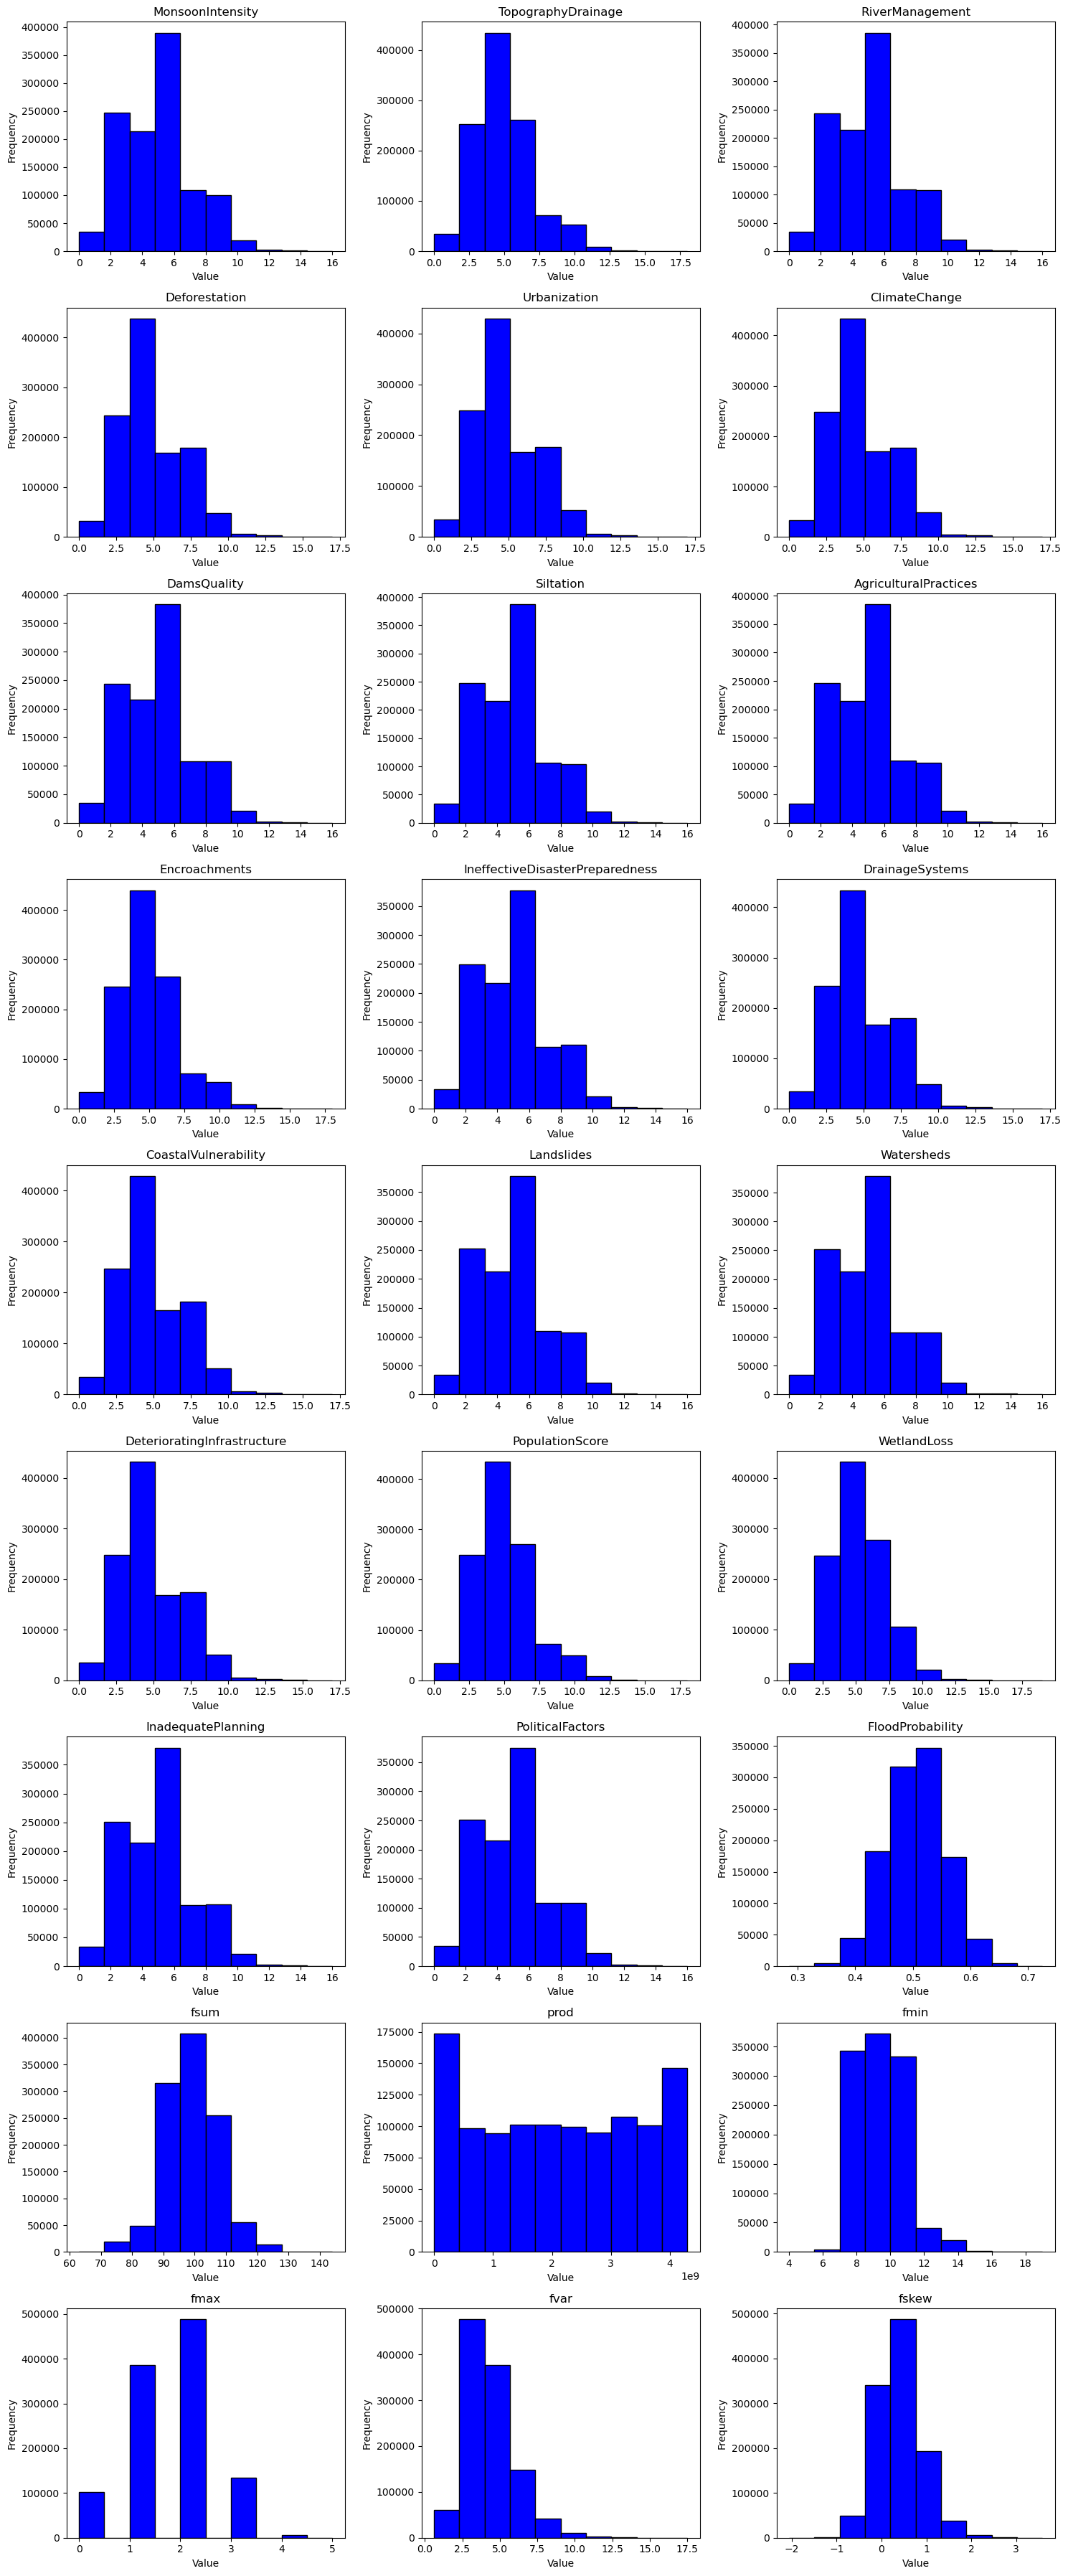

In [11]:
# Function to Generate Histogram
import math
def create_histograms(columns, data, color='#E94B3CFF'): 
    num_cols = len(columns)
    num_rows = math.ceil(num_cols / 3)  

    fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4)) 

    for i, col in enumerate(columns):
        row = i // 3
        col_num = i % 3
        ax = axs[row, col_num] if num_rows > 1 else axs[col_num]

        ax.hist(data[col], bins=10, color=color, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Hide unused subplots
    for i in range(num_cols, num_rows*3):
        row = i // 3
        col_num = i % 3
        axs[row, col_num].axis('off')

    plt.tight_layout()
    plt.show()
# HistoGram
create_histograms(tr_d.columns, tr_d , color = '#0000FF')


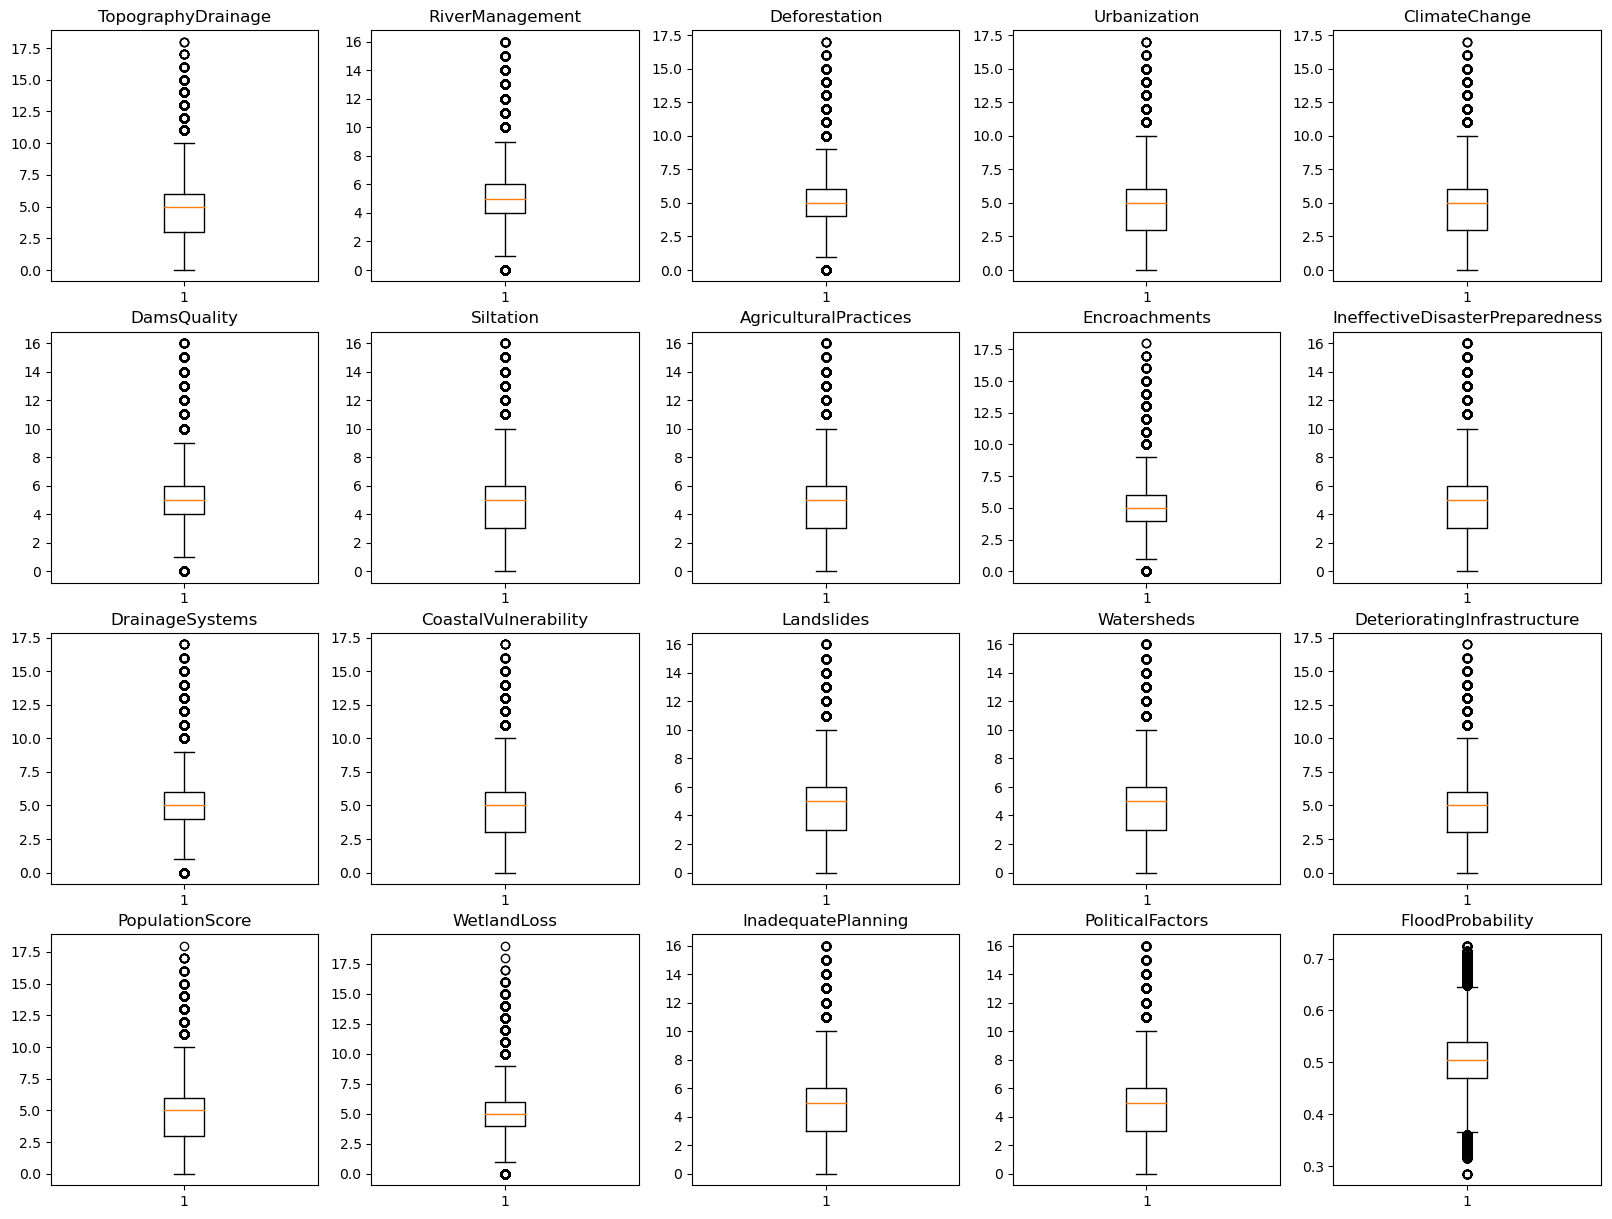

In [12]:
y = tr_d['FloodProbability']
X = tr_d.iloc[:, 1:-1]

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
count = 0
for i in range(4):
    for j in range(5):
        k = X.columns[count]
        axs[i,j].boxplot(X[k])
        axs[i,j].set_title(k)
        count+=1

plt.show()

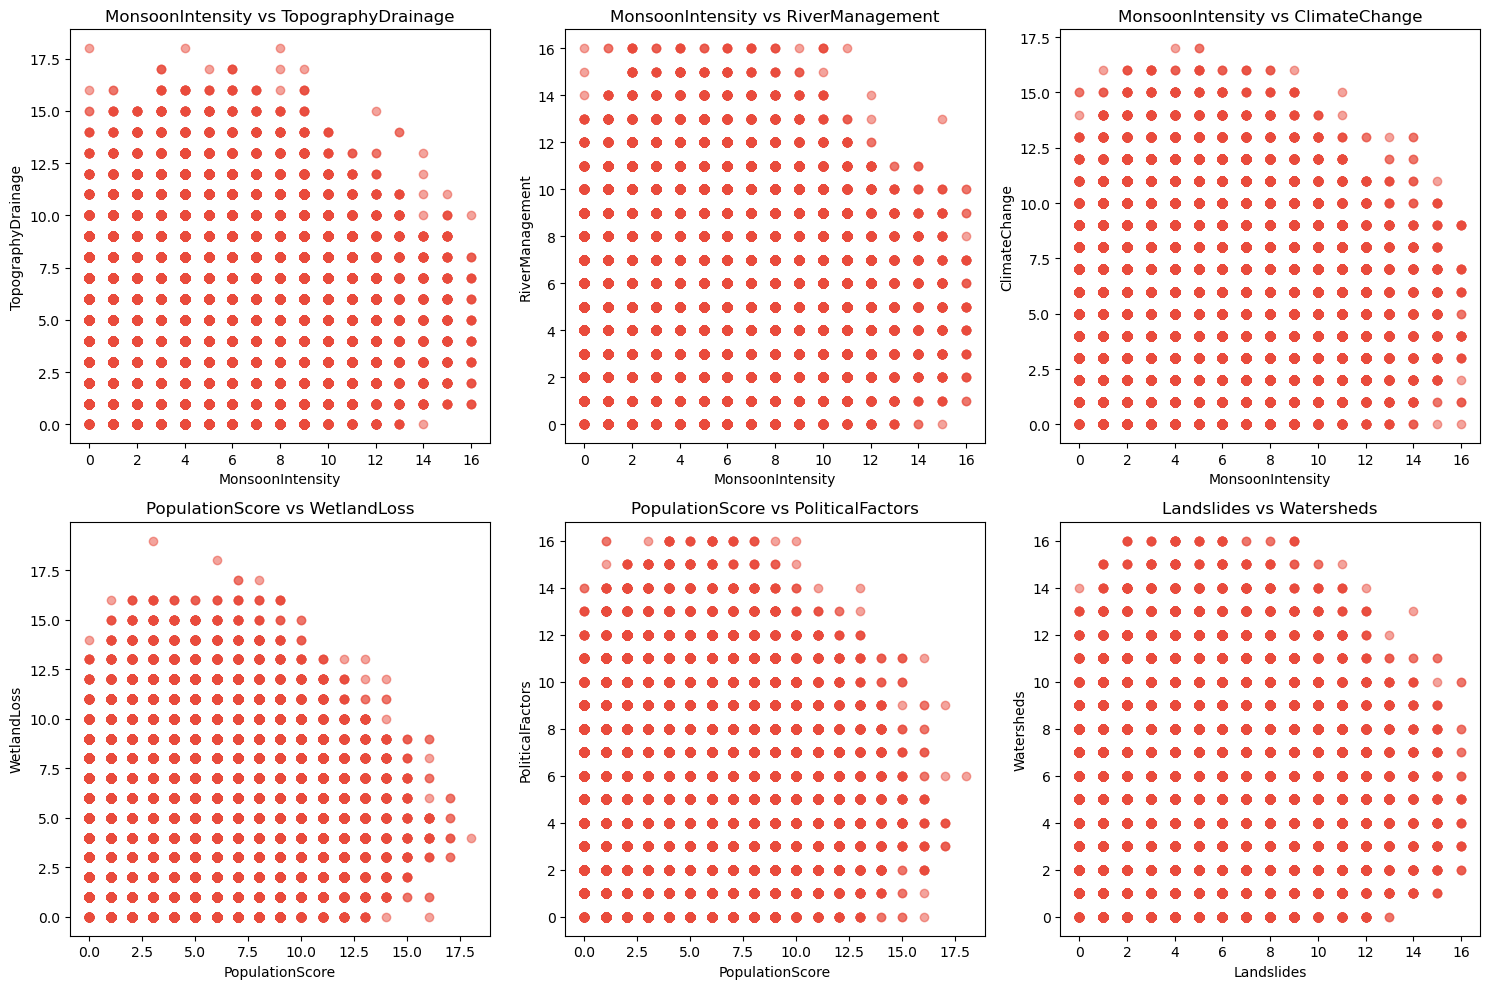

In [13]:
import matplotlib.pyplot as plt

# Function to Generate Scatter Plots for Specific Pairs of Columns
def create_scatter_plots(pairs, data, color='#E94B3CFF'): 
    num_pairs = len(pairs)
    num_rows = math.ceil(num_pairs / 3)  

    fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

    for i, (col1, col2) in enumerate(pairs):
        row = i // 3
        col_num = i % 3
        ax = axs[row, col_num] if num_rows > 1 else axs[col_num]

        ax.scatter(data[col1], data[col2], c=color, alpha=0.5)
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f'{col1} vs {col2}')

    # Hide unused subplots
    for i in range(num_pairs, num_rows*3):
        row = i // 3
        col_num = i % 3
        if num_rows > 1:
            axs[row, col_num].axis('off')
        else:
            axs[col_num].axis('off')

    plt.tight_layout()
    plt.show()

# Pairs of columns to plot
column_pairs = [
    ('MonsoonIntensity', 'TopographyDrainage'),
    ('MonsoonIntensity', 'RiverManagement'),
    ('MonsoonIntensity', 'ClimateChange'),
    ('PopulationScore', 'WetlandLoss'),
    ('PopulationScore', 'PoliticalFactors'),
    ('Landslides', 'Watersheds')
]

# Generate scatter plots for the specified pairs of columns
create_scatter_plots(column_pairs, tr_d, color='#E94B3CFF')


C:\Users\Nemer Nseir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of samples before cleaning: 1117957
Number of samples after cleaning: 1006161
Number of outliers removed: 111796


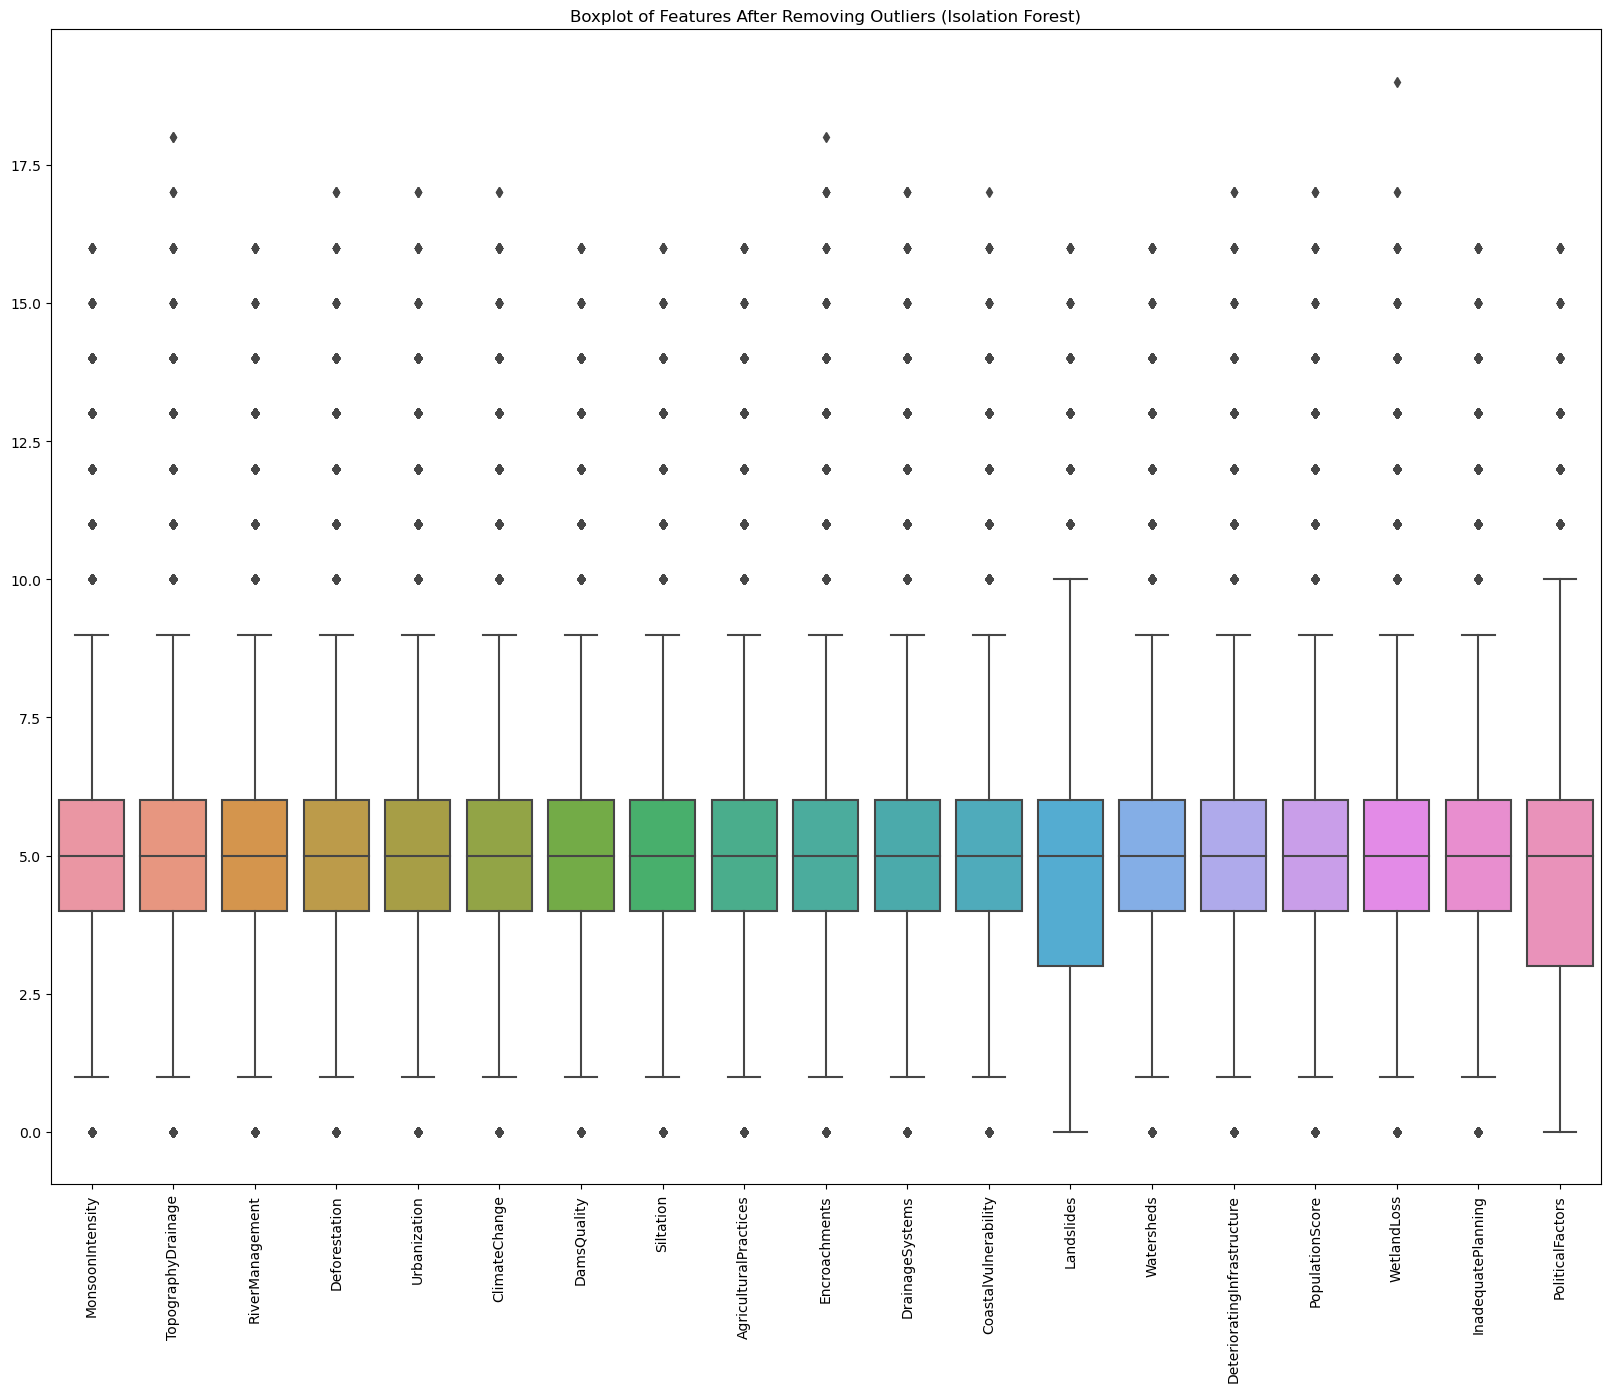

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')

# Select the necessary columns
columns_to_keep = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization',
    'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments',
    'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds',
    'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors'
]

# Select the necessary columns from the dataframe
X = df[columns_to_keep]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['outlier'] = iso_forest.fit_predict(X)

# Remove outliers
df_cleaned = df[df['outlier'] == 1].drop(columns=['outlier'])

# Display the number of samples before and after cleaning
num_samples_before = df.shape[0]
num_samples_after = df_cleaned.shape[0]
print(f"Number of samples before cleaning: {num_samples_before}")
print(f"Number of samples after cleaning: {num_samples_after}")
print(f"Number of outliers removed: {num_samples_before - num_samples_after}")

# Plot boxplots to visualize distributions after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_cleaned[columns_to_keep])
plt.xticks(rotation=90)
plt.title('Boxplot of Features After Removing Outliers (Isolation Forest)')
plt.show()

# Save cleaned data for further use
df_cleaned.to_csv('train_cleaned_isolation_forest.csv', index=False)


In [15]:
# Load the dataset
dfclean = pd.read_csv('train_cleaned_isolation_forest.csv')
# Display the shape of the data frames
print('Shape of the:')
print('Data set: ', dfclean.shape)

Shape of the:
Data set:  (1106777, 22)


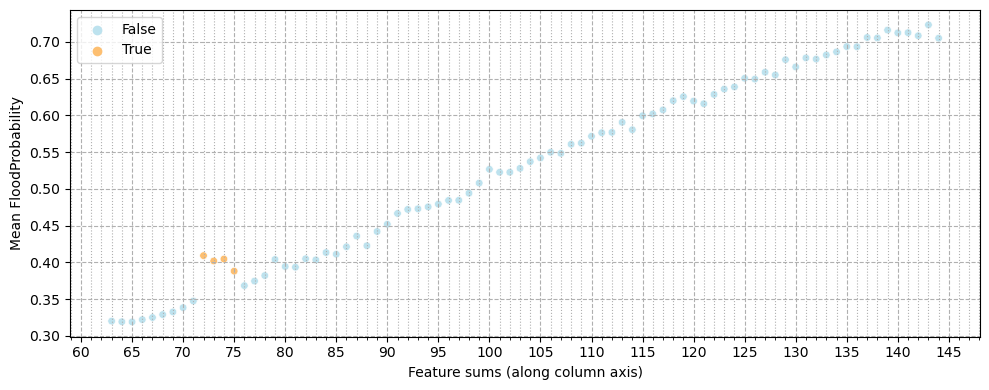

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Load the dataset
df = pd.read_csv('train.csv')

# Assuming 'FloodProbability' is your target variable
target = 'FloodProbability'

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['id', target])
y = df[target]

# Calculate the mean FloodProbability grouped by the sum of feature values along the rows
temp = df['FloodProbability'].groupby(X.sum(axis=1)).mean()

# Plot the results
plt.figure(figsize=(10, 4))
sns.scatterplot(x=temp.index, y=temp, hue=temp.index.isin(np.arange(72, 76)), s=30, palette='RdYlBu_r')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))
plt.grid(True, which='major', linestyle='--')
plt.grid(True, which='minor', linestyle=':')
plt.xlabel('Feature sums (along column axis)')
plt.ylabel('Mean FloodProbability')
plt.tight_layout()
plt.show()


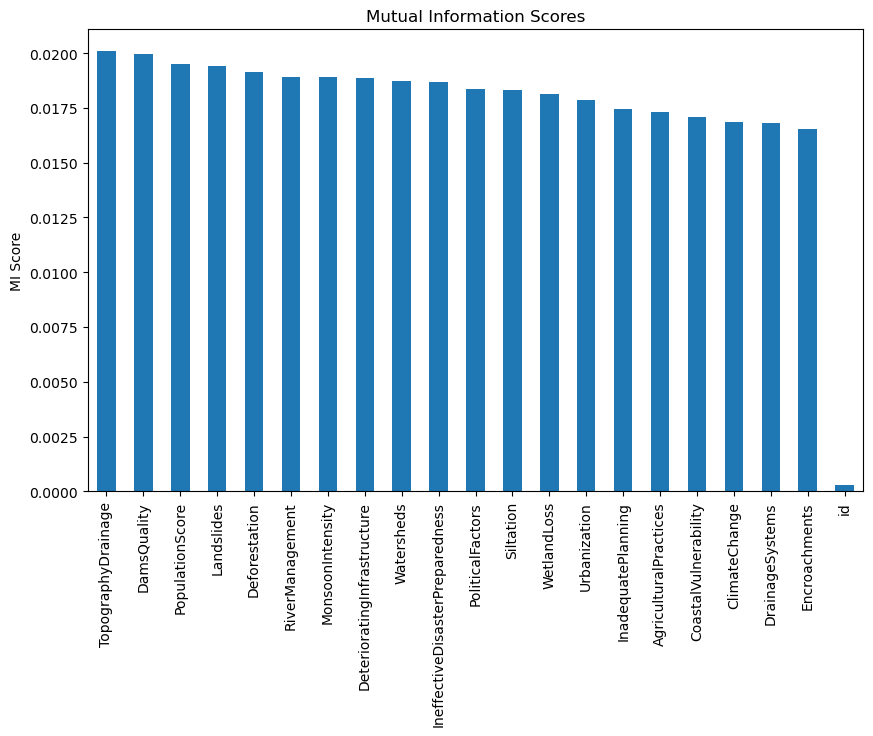

In [17]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train_cleaned_isolation_forest.csv')

# Assuming 'FloodProbability' is your target variable
target = 'FloodProbability'

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns, name="MI Scores")
mi_scores = mi_scores.sort_values(ascending=False)

# Plot the MI scores
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.ylabel('MI Score')
plt.show()


In [18]:
print(mi_scores)

TopographyDrainage                 0.020079
DamsQuality                        0.019950
PopulationScore                    0.019515
Landslides                         0.019398
Deforestation                      0.019156
RiverManagement                    0.018922
MonsoonIntensity                   0.018914
DeterioratingInfrastructure        0.018844
Watersheds                         0.018739
IneffectiveDisasterPreparedness    0.018672
PoliticalFactors                   0.018374
Siltation                          0.018324
WetlandLoss                        0.018132
Urbanization                       0.017879
InadequatePlanning                 0.017460
AgriculturalPractices              0.017315
CoastalVulnerability               0.017095
ClimateChange                      0.016869
DrainageSystems                    0.016815
Encroachments                      0.016543
id                                 0.000277
Name: MI Scores, dtype: float64


In [11]:
# Separate the features and target variable from training data
X_train = train_data.drop(columns=['FloodProbability'])
y_train = train_data['FloodProbability']

# Ensure consistency in feature columns between training and test data
common_cols = X_train.columns.intersection(test_data.columns)
X_train = X_train[common_cols]
X_test = test_data[common_cols]

# Optionally scale the data (e.g., using StandardScaler or MinMaxScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
# Predict on the training data
y_train_pred = knn_model.predict(X_train)

# Predict on the test data
y_test_pred = knn_model.predict(X_test)

# Evaluate the model performance on the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error on Training Set:", train_mse)
print("R^2 Score on Training Set:", train_r2)

# Since we don't have true values for the test set, we'll split the training set for evaluation
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the split training set
knn_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_valid_pred = knn_model.predict(X_valid_split)

# Evaluate the model performance on the validation set
valid_mse = mean_squared_error(y_valid_split, y_valid_pred)
valid_r2 = r2_score(y_valid_split, y_valid_pred)

print("Mean Squared Error on Validation Set:", valid_mse)
print("R^2 Score on Validation Set:", valid_r2)



C:\Users\Nemer Nseir\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [30]:
pip install xgboost


     -------------------------------------- 124.9/124.9 MB 3.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load the data
train_data = pd.read_csv('train_cleaned_isolation_forest.csv')
test_data = pd.read_csv('test.csv')

# Separate the features and target variable from training data
X_train = train_data.drop(columns=['FloodProbability'])
y_train = train_data['FloodProbability']

# Ensure consistency in feature columns between training and test data
common_cols = X_train.columns.intersection(test_data.columns)
X_train = X_train[common_cols]
X_test = test_data[common_cols]

# Optionally scale the data (e.g., using StandardScaler or MinMaxScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)
# Predict on the training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate the model performance on the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Split the training set for evaluation
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the split training set
xgb_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_valid_pred = xgb_model.predict(X_valid_split)

# Evaluate the model performance on the validation set
valid_mse = mean_squared_error(y_valid_split, y_valid_pred)
valid_r2 = r2_score(y_valid_split, y_valid_pred)

# Output the evaluation results
print("Mean Squared Error on Training Set:", train_mse)
print("R^2 Score on Training Set:", train_r2)
print("Mean Squared Error on Validation Set:", valid_mse)
print("R^2 Score on Validation Set:", valid_r2)




Mean Squared Error on Training Set: 0.0004654633891768138
R^2 Score on Training Set: 0.8136646692886246
Mean Squared Error on Validation Set: 0.0004913253319166567
R^2 Score on Validation Set: 0.8029396296545472


In [14]:
pip install scikit-learn


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('train_cleaned_isolation_forest.csv')

# Separate the features and target variable
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predict on the training data
y_train_pred_svr = svr.predict(X_train_scaled)

# Predict on the test data
y_test_pred_svr = svr.predict(X_test_scaled)

# Evaluate the SVR model
svr_train_mse = mean_squared_error(y_train, y_train_pred_svr)
svr_train_r2 = r2_score(y_train, y_train_pred_svr)

svr_test_mse = mean_squared_error(y_test, y_test_pred_svr)
svr_test_r2 = r2_score(y_test, y_test_pred_svr)

print(f"SVR Train Mean Squared Error: {svr_train_mse}")
print(f"SVR Train R^2 Score: {svr_train_r2}")
print(f"SVR Test Mean Squared Error: {svr_test_mse}")
print(f"SVR Test R^2 Score: {svr_test_r2}")


SVR Train Mean Squared Error: 0.0009831077437262674
SVR Train R^2 Score: 0.6066225463336454
SVR Test Mean Squared Error: 0.0009832075032210111
SVR Test R^2 Score: 0.6056559226137637
